# PL 4 - Classification with Cross Validation

In this class, we will explore the resampling techniques covered in the theoretical class of this week.

We will use the MNIST dataset, and develop models studied so far.
https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

**Get the dataset**



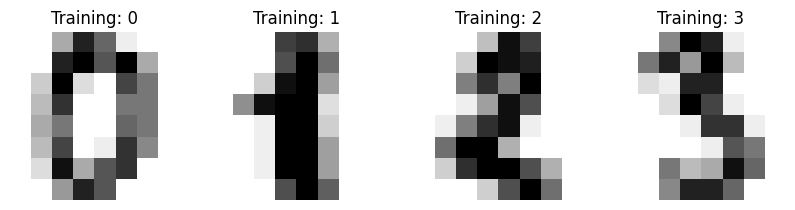

In [2]:
digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
#Separate into label and features

x, y = load_digits(return_X_y=True)

In [4]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [51]:
print(x.shape)

(1797, 64)


## Class objectives:

Implement the various cross validation approaches studied in the theoretical class:

1.   The validation set approach
2.   LOOCV - Leave one out cross validation
3.   K-fold Cross Validation
4.   Cross Validation Stratified


To test the various approaches you can use the Logistic Regression Model.


You must evaluate the resampling methods tested, justifying the results obtained, specifying the advantages and disadvantages of each other.

In the case of K-fold cross validation, several values of K must be tested and check how this parameter influences the results.

After applying Logistic Regression, you can apply LDA and check if your conclusions hold.

## Possible Solution

**The validation set aproach**

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [7]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [8]:
x_test = scaler.transform(x_test)

In [9]:
y_pred = model.predict(x_test)

In [10]:
model.score(x_train, y_train)

0.9643652561247216

In [11]:
model.score(x_test, y_test)

0.9343715239154616

In [12]:
confusion_matrix(y_test, y_pred)

array([[ 89,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  82,   3,   0,   0,   0,   1,   0,   1,   3],
       [  1,   0,  90,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0,   3,  83,   0,   0,   0,   2,   2,   3],
       [  0,   0,   0,   0,  73,   0,   0,   2,   0,   1],
       [  0,   0,   0,   0,   0, 103,   1,   0,   0,   4],
       [  0,   1,   0,   0,   1,   0,  87,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  77,   0,   0],
       [  0,   4,   2,   3,   0,   3,   2,   0,  72,   6],
       [  0,   0,   0,   3,   0,   2,   0,   2,   1,  84]], dtype=int64)

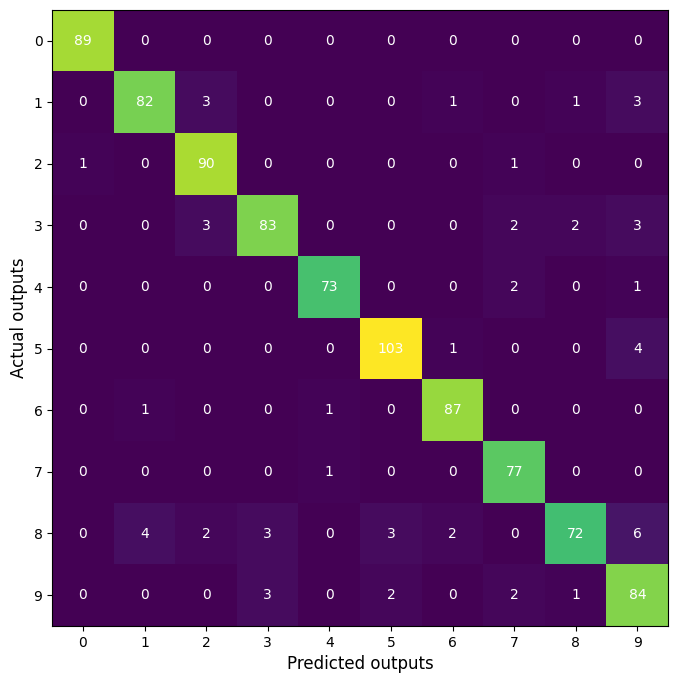

In [13]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       0.94      0.91      0.93        90
           2       0.92      0.98      0.95        92
           3       0.93      0.89      0.91        93
           4       0.97      0.96      0.97        76
           5       0.95      0.95      0.95       108
           6       0.96      0.98      0.97        89
           7       0.92      0.99      0.95        78
           8       0.95      0.78      0.86        92
           9       0.83      0.91      0.87        92

    accuracy                           0.93       899
   macro avg       0.94      0.94      0.93       899
weighted avg       0.94      0.93      0.93       899



**LOOCV - Leave one out cross validation**

In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from statistics import mean

In [16]:
# create loocv procedure
cv = LeaveOneOut()

In [17]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)

In [18]:
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))

Accuracy: 0.967 (0.178)


**K-Fold Cross Validation**

In [19]:
from sklearn.model_selection import KFold, cross_val_score

In [20]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)

In [21]:
k_folds = KFold(n_splits = 5)

In [22]:
scores = cross_val_score(model, x, y, scoring='accuracy', cv = k_folds, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), np.std(scores)))
print(f'Scores: ', scores)

Accuracy: 0.928 (0.027)
Scores:  [0.93055556 0.89166667 0.94986072 0.9637883  0.90529248]


#LDA

**Apply stratified cross validation with LDA**


In [23]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
# define model
model = LinearDiscriminantAnalysis()

In [25]:
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [26]:
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(f'Scores: ', scores)

Mean Accuracy: 0.953 (0.013)
Scores:  [0.96666667 0.95       0.97222222 0.93333333 0.94444444 0.95
 0.94444444 0.96089385 0.94413408 0.95530726 0.95555556 0.95
 0.95       0.97222222 0.96111111 0.96666667 0.93333333 0.93854749
 0.94972067 0.94972067 0.96666667 0.95       0.98333333 0.96666667
 0.95       0.94444444 0.95555556 0.93296089 0.96648045 0.93854749]
